### 데이터 불러오기

In [1]:
%%time
import yfinance as yf
import pandas as pd
import datetime as dt

# 시작 날짜와 종료 날짜 설정
start_date = dt.datetime.now() - dt.timedelta(days=30)
end_date = dt.datetime.now()

# S&P 500 지수 가져오기
sp500_data = yf.download(tickers='^GSPC', start=start_date, end=end_date)['Adj Close']
sp500_data = sp500_data.pct_change().add(1).cumprod()

# 미국 채권 수익률 데이터 가져오기
bond_yield_data = yf.download(tickers='BND', start=start_date, end=end_date)['Adj Close']
bond_yield_data = bond_yield_data.pct_change().add(1).cumprod()

# 각 섹터별(총 10개) 해당하는 기업의 티커 리스트
non_memory_semicon_ai_ticks = ['005930.KS', '042700.KS', '000990.KS', '058470.KQ', '039030.KQ', '036830.KQ', 'AMD', 'QCOM', 'NVDA', 'INTC', 'AVGO', 'ASML', 'TSMC34.SA', 'AMAT']
renew_energy_hydrogen_ticks = ['120110.KS', '271940.KS', '336260.KS', '018880.KS', '009830.KS', '100090.KS', '112610.KS', 'PLUG', 'NKLA', 'AIL.SG', 'BE', 'SHEL', 'LIN', '5020.T']
blockchain_coin_ticks = ['COIN', 'RIOT', 'MSTR', '9449.T', 'CME', 'GLXY.TO', 'MARA', 'CAN', '112040.KQ', '027830.KQ', 'HUT', '8473.T', 'CLSK', 'OSTK', 'ACN']
small_reactor_ticks = ['SMR', 'BWXT', 'CCJ', '100840.KS', '034020.KS', 'NXE', 'UEC', '000720.KS', 'DNN', 'YCA.L', 'UUUU', 'NDTAF', 'APLD', '011700.KS', '046120.KQ']
bio_healthcare_ticks = ['068270.KS', '207940.KS', '091990.KQ', '326030.KS', '028300.KQ', '071200.KQ', '302440.KS', 'UNH', 'LLY', 'JNJ', 'ABBV', 'MRK', 'PFE', 'AZN', 'NVO']
memory_semicon_foundry_ticks = ['005930.KS', '000660.KS', '042700.KS', '000990.KS', '005290.KQ', '036930.KQ', '086390.KQ', 'UMC', 'QCOM', 'MU', 'AVGO', 'AMD', 'TXN', '2454.TW', 'TSMC34.SA', 'GFS']
battery_elec_vehicle_ticks = ['006400.KS', '247540.KQ', '003670.KS', '373220.KS', '066970.KQ', '300750.SZ', 'BYD', 'TSLA', 'RIVN', 'LI', 'SEDG', 'BHP', 'LCID', 'ALB', 'SQM']
nano_mat_chemical_oil_ticks = ['027580.KQ', '079980.KS', '077360.KQ', '012610.KS', '121600.KQ', 'BPA', 'CBT', 'CALP', 'ALTI', 'ACO', 'AFCO', '078130.KQ', '051910.KS', '011780.KS']
space_satellite_defense_ticks = ['BA', 'LMT', 'GD', 'NOC', 'RTX', 'LHX', 'AXON', 'HWM', '012450.KS', '272210.KS', '047810.KS', '064350.KS', '189300.KQ', '099320.KQ', '211270.KQ']
cyber_security_ticks = ['PANW', 'CRWD', 'AKAM', 'FTNT', 'ZS', 'CYBR', 'PLTR', 'IONQ', '053800.KQ', '258790.KQ', '053350.KQ', '203650.KQ', '136540.KQ', '356680.KQ', '056360.KQ']



# 위에서 정의한 기업 티커 리스트를 기반으로 데이터 가져오기
# 각 섹터별 기업 리스트를 이중 리스트로 정의
sector_ticks = [non_memory_semicon_ai_ticks, renew_energy_hydrogen_ticks, blockchain_coin_ticks, small_reactor_ticks, bio_healthcare_ticks,
               memory_semicon_foundry_ticks, battery_elec_vehicle_ticks, nano_mat_chemical_oil_ticks, space_satellite_defense_ticks, cyber_security_ticks]

# 데이터 프레임을 담을 빈 리스트 생성
sector_dataframes = []

# 각 섹터별로 데이터를 가져와서 데이터 프레임으로 변환 후 리스트에 추가
for tick_list in sector_ticks:
    sector_data = yf.download(tickers=tick_list, start=start_date, end=end_date)['Adj Close'].ffill() # 수정종가를 price로 사용 & na값 ffill로 채우기
    sector_dataframes.append(sector_data.pct_change().add(1).cumprod()) # 누적수익률 계산

# 섹터명을 기반으로 데이터 프레임을 딕셔너리에 저장
sector_names = ['비메모리/AI', '신재생애너지/수소', 'Blockchain&Coin', 'SMR', '바이오/헬스케어', '메모리/파운드리', '배터리/전기차', '나노소재/화학/정유', '우주위성/국방', '사이버보안']

# sector_names 리스트와 sector_dataframes 리스트를 결합하여 새로운 사전(sector_dict)을 만듬
sector_dict = dict(zip(sector_names, sector_dataframes))

# 각 섹터별 데이터를 데이터프레임으로 생성
for sector_name, sector_df in sector_dict.items():
    sector_dict[sector_name] = pd.DataFrame(sector_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed


1 Failed download:
['091990.KQ']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  14 of 14 completed



5 Failed downloads:
['078130.KQ']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
['ACO', 'CALP', 'BPA', 'AFCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-24 16:24:14.289749 -> 2024-03-25 16:24:14.289756)')


[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
CPU times: user 5.69 s, sys: 675 ms, total: 6.36 s
Wall time: 7.47 s


In [2]:
# 시장, 채권, 섹터 수익률 합치기
yield_df = pd.DataFrame()
yield_df[sector_names[0]] = sector_dict[sector_names[0]].mean(axis=1)
yield_df[sector_names[1]] = sector_dict[sector_names[1]].mean(axis=1)
yield_df[sector_names[2]] = sector_dict[sector_names[2]].mean(axis=1)
yield_df[sector_names[3]] = sector_dict[sector_names[3]].mean(axis=1)
yield_df[sector_names[4]] = sector_dict[sector_names[4]].mean(axis=1)
yield_df[sector_names[5]] = sector_dict[sector_names[5]].mean(axis=1)
yield_df[sector_names[6]] = sector_dict[sector_names[6]].mean(axis=1)
yield_df[sector_names[7]] = sector_dict[sector_names[7]].mean(axis=1)
yield_df[sector_names[8]] = sector_dict[sector_names[8]].mean(axis=1)
yield_df[sector_names[9]] = sector_dict[sector_names[9]].mean(axis=1)
yield_df['s&p500'] = sp500_data
#yield_df['bond'] = bond_yield_data
yield_df.dropna(axis=0, how='all', inplace=True) # 모든 행이 NaN이면 그 행 삭제(해당 데이터에 있는 모든 주식시장의 영업일이 아님을 의미)
yield_df = yield_df[-20:]

print(yield_df.shape)
print(f"주식 데이터 시작 날짜: {yield_df.index[0]}")
print(f"주식 데이터 종료 날짜: {yield_df.index[-1]}")

(20, 11)
주식 데이터 시작 날짜: 2024-02-27 00:00:00
주식 데이터 종료 날짜: 2024-03-25 00:00:00


In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

s_date = yield_df.index[0]
e_date = yield_df.index[-1]
s_date_str = s_date.strftime('%Y-%m-%d')
e_date_str = e_date.strftime('%Y-%m-%d')

# 합친 문자열 생성
date_string = f'{s_date_str[5:]}~{e_date_str[5:]}'

### 한달, 2주, 1주간 시장, 채권 누적 수익률 시각화

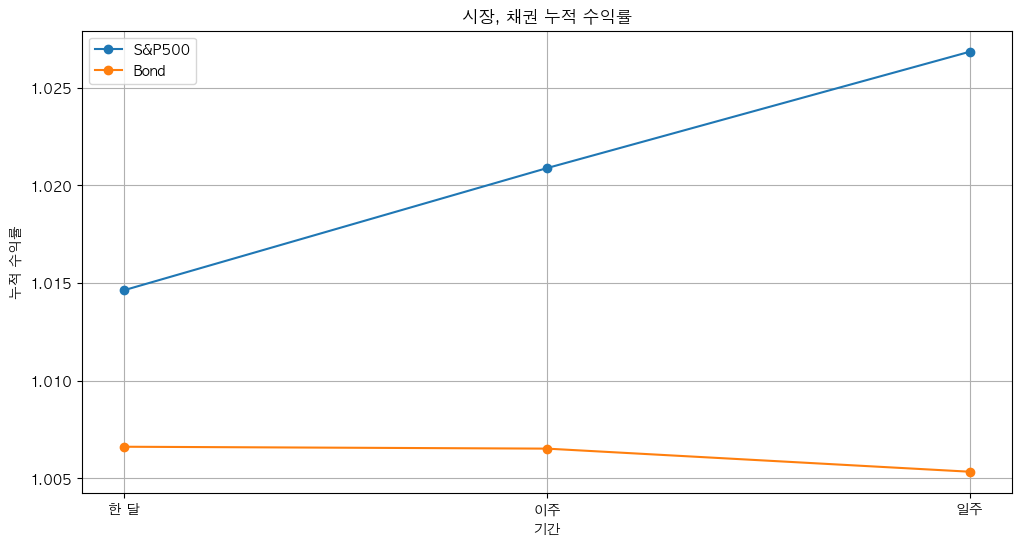

In [4]:
# 한 달, 이주, 일주의 x 축 레이블 생성
period_labels = ['한 달', '이주', '일주']

# 각 기간의 누적 수익률 데이터 선택
sp500_data_4visual = [sp500_data[-20:].mean(), sp500_data[-10:].mean(), sp500_data[-5:].mean()]
bond_data_4visual = [bond_yield_data[-20:].mean(), bond_yield_data[-10:].mean(), bond_yield_data[-5:].mean()]

plt.figure(figsize=(12, 6))
plt.plot(period_labels, sp500_data_4visual, marker='o', label='S&P500')
plt.plot(period_labels, bond_data_4visual, marker='o', label='Bond')

plt.title('시장, 채권 누적 수익률')
plt.xlabel('기간')
plt.ylabel('누적 수익률')
plt.grid(True)
plt.legend()
#plt.savefig(f'{date_string}간 시장,채권(기간별).png', dpi=300)
plt.show()


### 일별 시장, 채권 누적 수익률 시각화

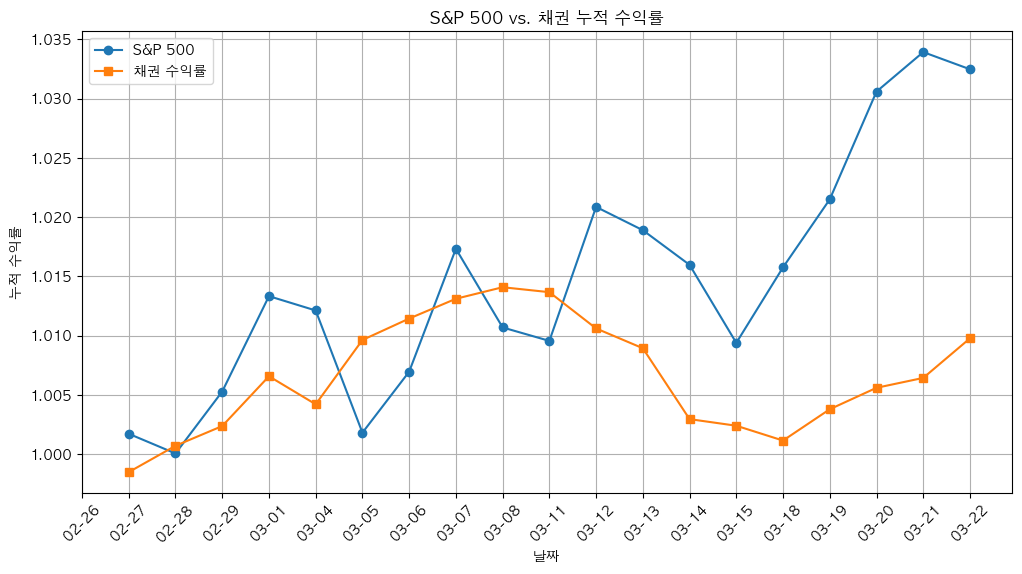

In [5]:
# 한달간 시장, 채권 누적 수익률 시각화
tmp = sp500_data[-20:]

tmp = pd.DataFrame(tmp).reset_index()

# datetime 형태를 character로 (x축에 모든 date를 연속적으로 표시하기 위함)
tmp['Date'] = tmp['Date'].astype(str)
tmp['Date'] = tmp['Date'].apply(lambda x: x[5:]) # 년도를 제거하고 월,일의 데이터만 추출

plt.figure(figsize=(12, 6))
plt.plot(tmp['Date'], sp500_data[-20:], label='S&P 500', marker='o')
plt.plot(tmp['Date'], bond_yield_data[-20:], label='채권 수익률', marker='s')

plt.title('S&P 500 vs. 채권 누적 수익률')
plt.xlabel('날짜')
plt.ylabel('누적 수익률')
plt.xticks(tmp['Date'], rotation=45)
plt.grid(True)
plt.legend()
#plt.savefig(f'{date_string}간 시장,채권(일별).png', dpi=300)
plt.show()

### 상위, 하위 3개 섹터 계산

In [6]:
# 한 달, 2주, 1주의 누적 수익률 계산
one_month_returns = yield_df.iloc[-20:].mean()
two_weeks_returns = yield_df.iloc[-10:].mean()
one_week_returns = yield_df.iloc[-5:].mean()

# 가중평균을 위한 가중치 설정
weights = [0.4, 0.3, 0.3]  # 한 달: 40%, 2 주: 30%, 1 주: 30%

# 각 기간의 S&P 500과의 비교 결과에 가중치 적용
sector_weighted_returns = (one_month_returns * weights[0] + two_weeks_returns * weights[1] + one_week_returns * weights[2])
sp500_weighted_return = (one_month_returns['s&p500'] * weights[0] + two_weeks_returns['s&p500'] * weights[1] + one_week_returns['s&p500'] * weights[2])

# S&P 500을 이긴 상위 3개 섹터 선택
positive_top_sectors = (sector_weighted_returns - sp500_weighted_return).nlargest(3)
top_sectors = positive_top_sectors[positive_top_sectors > 0] # 0보다 큰 경우만 return

# S&P 500에게 진 하위 3개 섹터 선택
negative_bottom_sectors = (sector_weighted_returns - sp500_weighted_return).nsmallest(3)
bottom_sectors = negative_bottom_sectors[negative_bottom_sectors < 0] # 0보다 작은 경우만 return

print("상위 3개 섹터:\n", top_sectors)
print("\n하위 3개 섹터:\n", bottom_sectors)

상위 3개 섹터:
 SMR         0.066283
메모리/파운드리    0.040819
비메모리/AI     0.025981
dtype: float64

하위 3개 섹터:
 사이버보안        -0.040327
나노소재/화학/정유   -0.027133
신재생애너지/수소    -0.006116
dtype: float64


### 상위, 하위 3개 섹터 한달, 2주, 1주간 누적수익률 그래프

In [7]:
# 데이터프레임을 리스트로 묶기
returns_list = [one_month_returns, two_weeks_returns, one_week_returns]

# 각 데이터프레임을 새로운 열로 추가하고 열 이름 부여
for i, df in enumerate(returns_list):
    returns_list[i] = df.rename(f'{df.name}_returns')

# 데이터프레임 합치기
combined_returns = pd.concat(returns_list, axis=1)

# 컬럼명 변경
combined_returns.columns = ["one_month", "two_weeks", "one_week"]

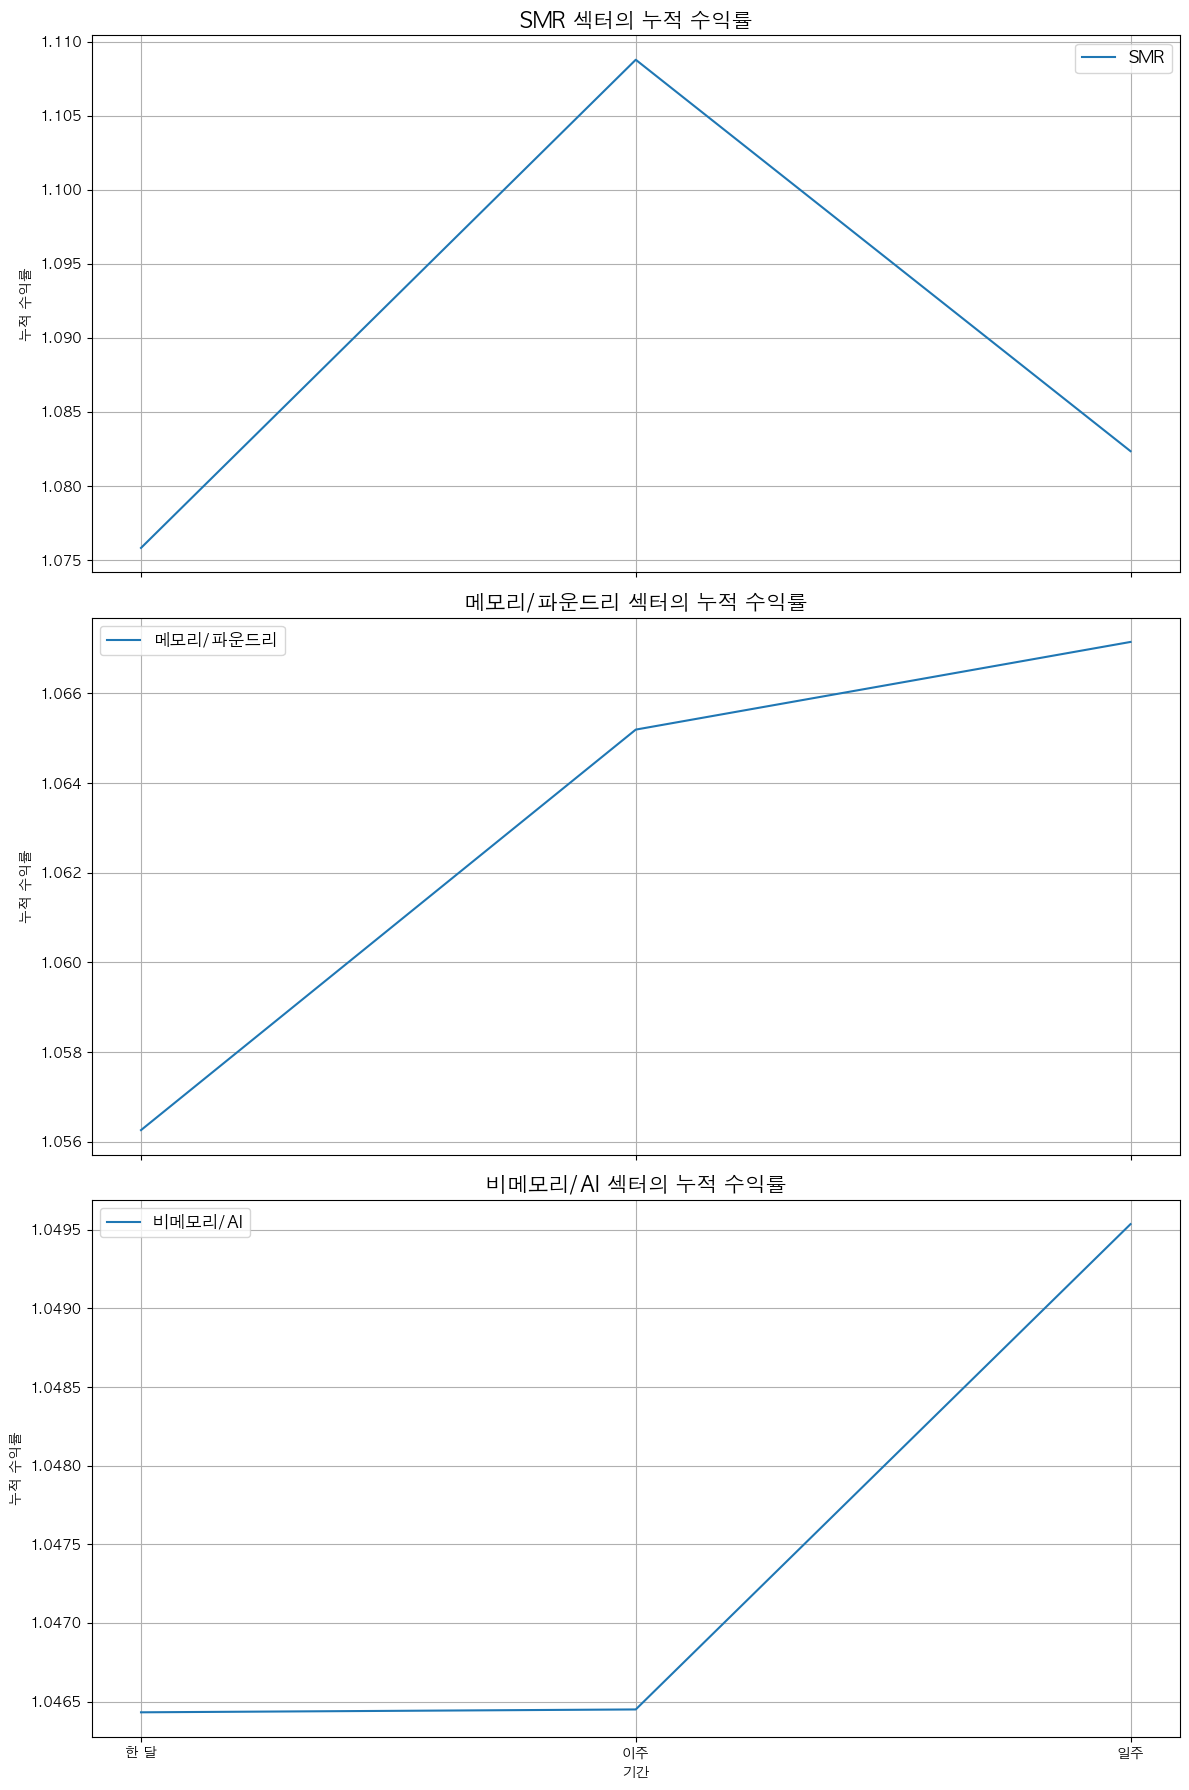

In [8]:
# top_sectors가 3개 미만이면 해당 개수만큼의 그래프를 그림
num_sectors = len(top_sectors)
fig, axs = plt.subplots(num_sectors, 1, figsize=(12, 6 * num_sectors), sharex=True)

for i in range(num_sectors):
    sector_name = top_sectors.index[i]
    sector_returns = combined_returns.loc[sector_name, :]  # 섹터의 누적 수익률 선택
    
    axs[i].plot(period_labels, sector_returns, label=sector_name)  # 섹터 누적 수익률 그래프

# S&P 500 누적 수익률 그래프를 추가
#axs[0].plot(period_labels, sp500_data[-3:], label='S&P 500', linestyle='--')

# 각 서브 그래프에 제목과 레이블 추가
for i, ax in enumerate(axs):
    ax.set_title(f'{top_sectors.index[i]} 섹터의 누적 수익률', fontsize=15)
    ax.set_ylabel('누적 수익률')
    ax.grid(True)
    ax.legend(fontsize='large')

plt.xlabel('기간')
plt.tight_layout()  # 서브 그래프 간 간격 조정
#plt.savefig(f'{date_string}간 상위섹터(기간별).png', dpi=300)
plt.show()

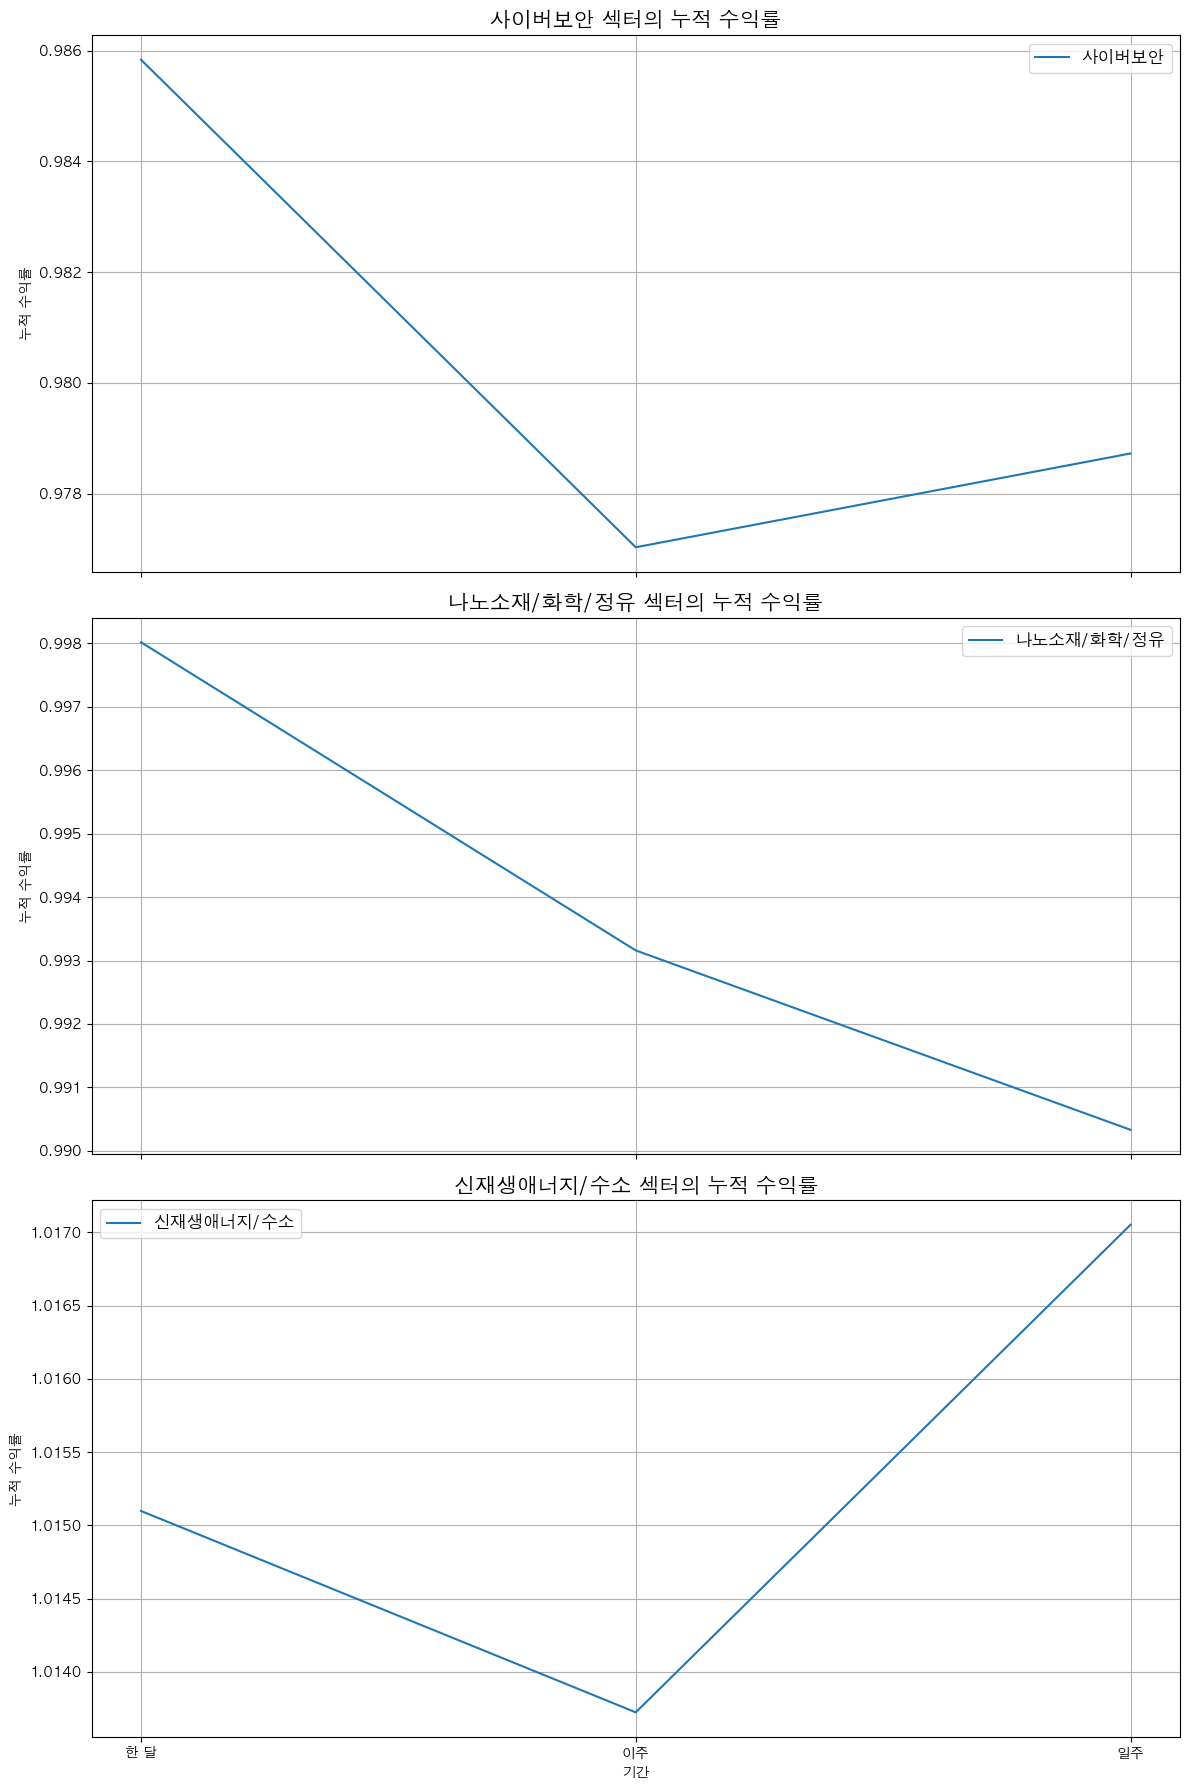

In [9]:
# top_sectors가 3개 미만이면 해당 개수만큼의 그래프를 그림
num_sectors = len(bottom_sectors)
fig, axs = plt.subplots(num_sectors, 1, figsize=(12, 6 * num_sectors), sharex=True)

for i in range(num_sectors):
    sector_name = bottom_sectors.index[i]
    sector_returns = combined_returns.loc[sector_name, :]  # 섹터의 누적 수익률 선택
    
    axs[i].plot(period_labels, sector_returns, label=sector_name)  # 섹터 누적 수익률 그래프

# S&P 500 누적 수익률 그래프를 추가
#axs[0].plot(period_labels, sp500_data[-3:], label='S&P 500', linestyle='--')

# 각 서브 그래프에 제목과 레이블 추가
for i, ax in enumerate(axs):
    ax.set_title(f'{bottom_sectors.index[i]} 섹터의 누적 수익률', fontsize=15)
    ax.set_ylabel('누적 수익률')
    ax.grid(True)
    ax.legend(fontsize='large')

plt.xlabel('기간')
plt.tight_layout()  # 서브 그래프 간 간격 조정
#plt.savefig(f'{date_string}간 상위섹터(기간별).png', dpi=300)
plt.show()

### 상위, 하위 3개 섹터 일별 누적수익률 그래프

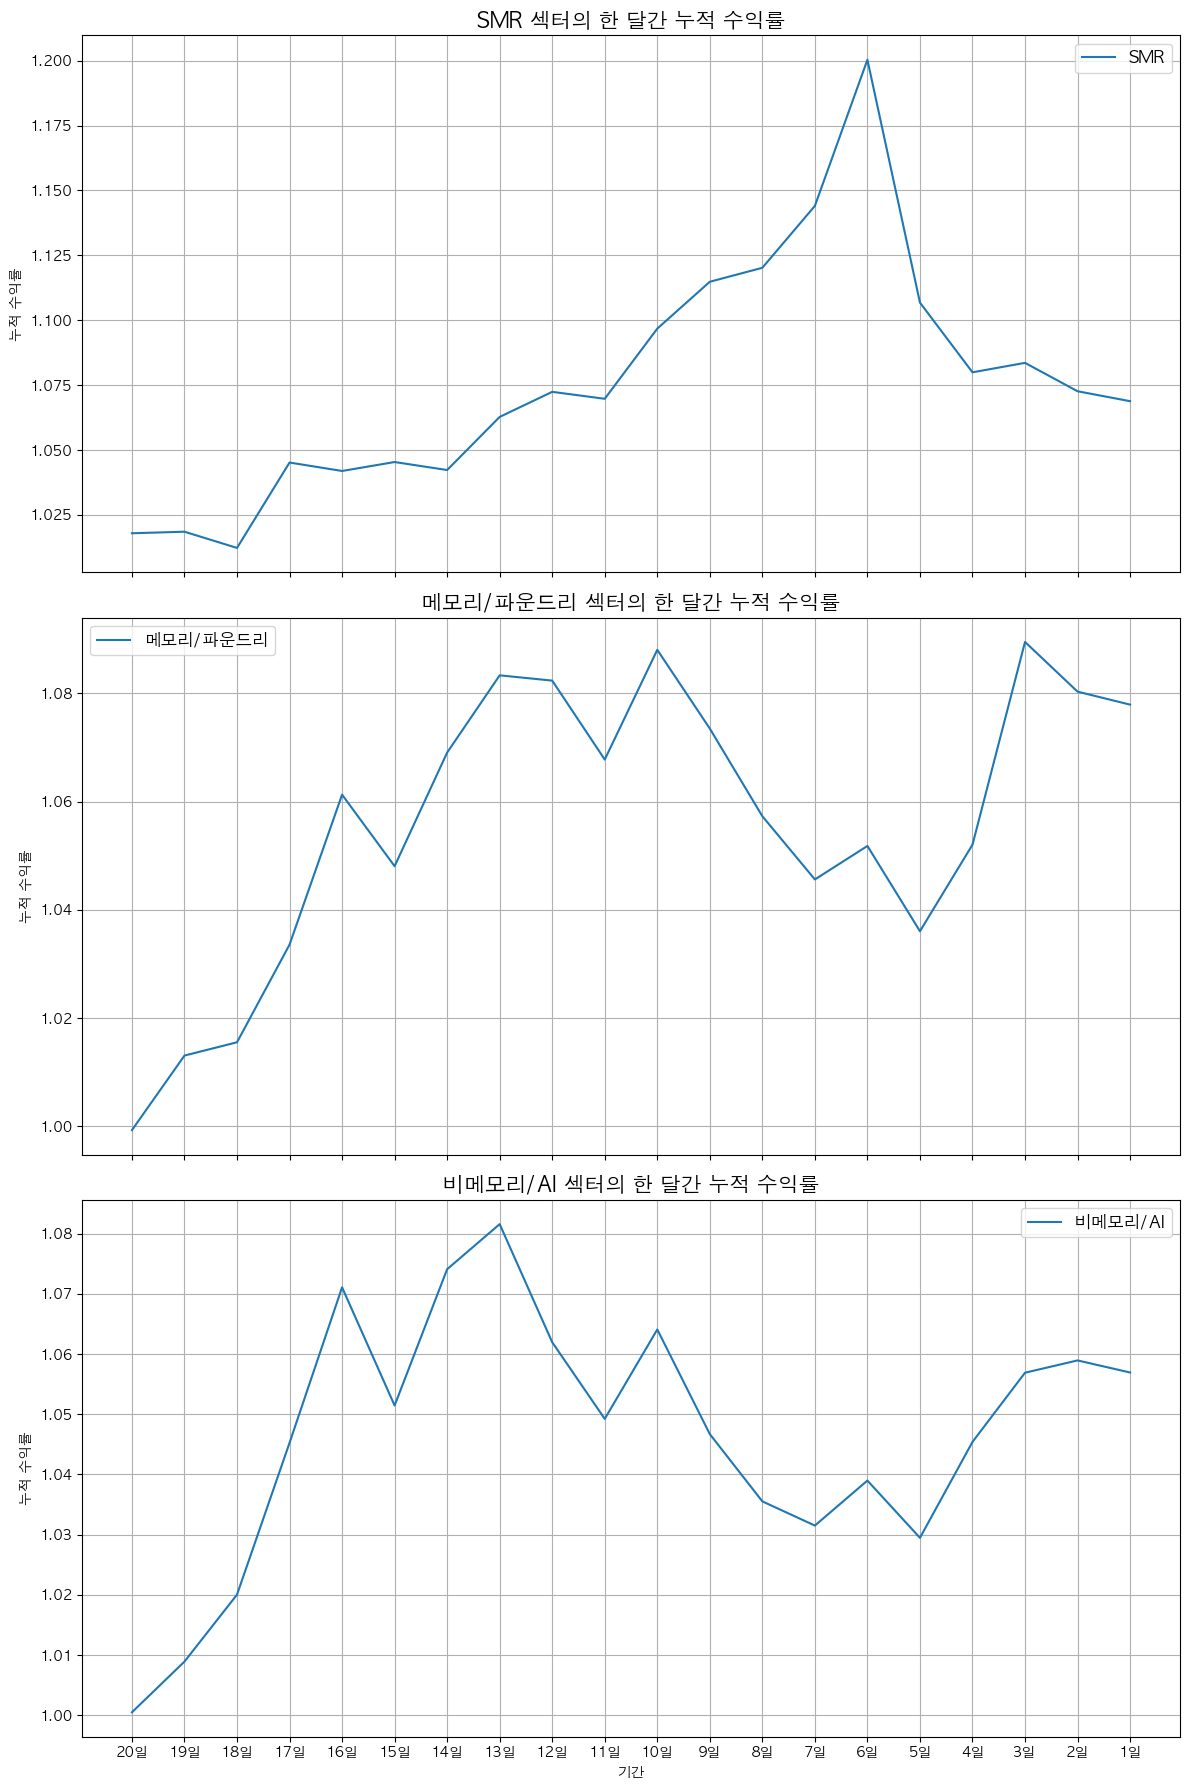

In [10]:
# top_sectors가 3개 미만이면 해당 개수만큼의 그래프를 그림
num_sectors = len(top_sectors)
fig, axs = plt.subplots(num_sectors, 1, figsize=(12, 6 * num_sectors), sharex=True)

# 한 달 동안의 x 축 레이블 생성
one_month_labels = [f'{i+1}일' for i in reversed(range(20))]

for i in range(num_sectors):
    sector_name = top_sectors.index[i]
    sector_returns = yield_df[sector_name][-20:]  # 최근 한 달간의 누적 수익률 선택
    
    axs[i].plot(one_month_labels, sector_returns, label=sector_name)  # 섹터 누적 수익률 그래프

# S&P 500 누적 수익률 그래프를 추가
#axs[0].plot(period_labels, sp500_data[-3:], label='S&P 500', linestyle='--')

# 각 서브 그래프에 제목과 레이블 추가
for i, ax in enumerate(axs):
    ax.set_title(f'{top_sectors.index[i]} 섹터의 한 달간 누적 수익률', fontsize=15)
    ax.set_ylabel('누적 수익률')
    ax.grid(True)
    ax.legend(fontsize='large')

plt.xlabel('기간')
plt.tight_layout()  # 서브 그래프 간 간격 조정
#plt.savefig(f'{date_string}간 상위섹터(일별).png', dpi=300)
plt.show()


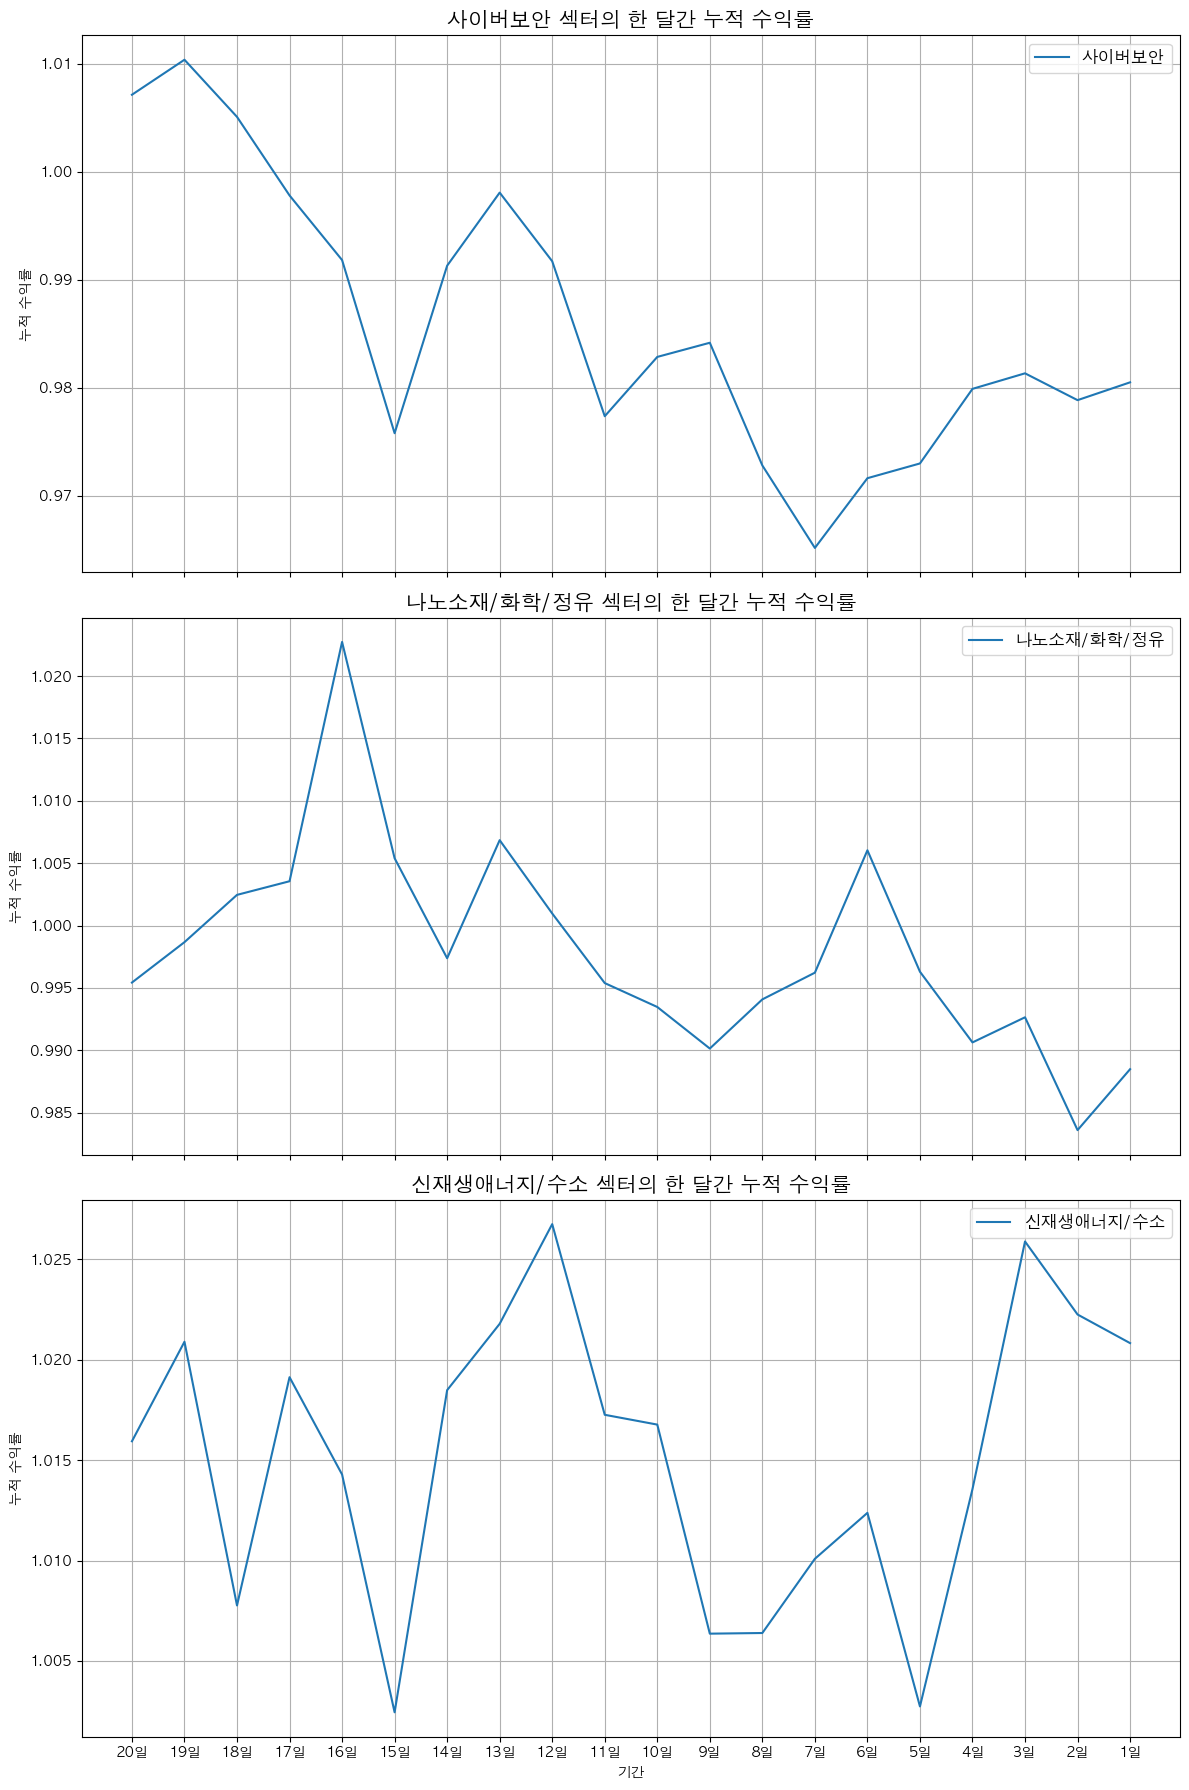

In [11]:
# bottom_sectors가 3개 미만이면 해당 개수만큼의 그래프를 그림
num_sectors = len(bottom_sectors)
fig, axs = plt.subplots(num_sectors, 1, figsize=(12, 6 * num_sectors), sharex=True)

# 한 달 동안의 x 축 레이블 생성
one_month_labels = [f'{i+1}일' for i in reversed(range(20))]

for i in range(num_sectors):
    sector_name = bottom_sectors.index[i]
    sector_returns = yield_df[sector_name][-20:]  # 최근 한 달간의 누적 수익률 선택
    
    axs[i].plot(one_month_labels, sector_returns, label=sector_name)  # 섹터 누적 수익률 그래프

# S&P 500 누적 수익률 그래프를 추가
#axs[0].plot(period_labels, sp500_data[-3:], label='S&P 500', linestyle='--')

# 각 서브 그래프에 제목과 레이블 추가
for i, ax in enumerate(axs):
    ax.set_title(f'{bottom_sectors.index[i]} 섹터의 한 달간 누적 수익률', fontsize=15)
    ax.set_ylabel('누적 수익률')
    ax.grid(True)
    ax.legend(fontsize='large')

plt.xlabel('기간')
plt.tight_layout()  # 서브 그래프 간 간격 조정
#plt.savefig(f'{date_string}간 하위섹터(일별).png', dpi=300)
plt.show()
